In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'.\train_LZdllcl.csv')

In [3]:
train[train.is_promoted == 1 ].describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,4668.000000,4668.000000,4668.000000,4329.000000,4668.000000,4668.000000,4668.000000,4668.000000,4668.0
mean,39285.092331,1.203299,34.372965,3.986140,5.716367,0.698800,0.119751,71.325193,1.0
std,22754.632174,0.513805,7.081449,1.052149,4.007772,0.458828,0.324706,14.746122,0.0
min,39.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,41.000000,1.0
25%,19390.500000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,59.000000,1.0
50%,39439.500000,1.000000,33.000000,4.000000,5.000000,1.000000,0.000000,71.000000,1.0
75%,59082.250000,1.000000,38.000000,5.000000,7.000000,1.000000,0.000000,84.000000,1.0
max,78292.000000,6.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.0


In [4]:
train['good_score'] = train.avg_training_score.apply(lambda x : 1 if x>71 else 0)
train['young_emp'] = train.age.apply(lambda x : 1 if x<  else 0)

In [14]:
train.head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,good_score,young_emp
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0,1,1
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0,0,1
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0,0,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0,1,1
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0,0,1


In [6]:
final = pd.get_dummies(train.department)
final = pd.concat([final,pd.get_dummies(train.region)],axis=1)
final = pd.concat([final,pd.get_dummies(train.education)],axis=1)
final = pd.concat([final,pd.get_dummies(train.gender)],axis=1)
final = pd.concat([final,pd.get_dummies(train.recruitment_channel)],axis=1)
final = pd.concat([final,train.no_of_trainings],axis=1)
final = pd.concat([final,train.age],axis=1)
final = pd.concat([final,pd.get_dummies(train.previous_year_rating)],axis=1)
final = pd.concat([final,train.length_of_service],axis=1)
final = pd.concat([final,train['KPIs_met >80%']],axis=1)
final = pd.concat([final,train['awards_won?']],axis=1)
final = pd.concat([final,train['avg_training_score']],axis=1)
final = pd.concat([final,train['good_score']],axis=1)
final = pd.concat([final,train['young_emp']],axis=1)
final.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,region_1,...,2.0,3.0,4.0,5.0,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,good_score,young_emp
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,8,1,0,49,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,4,0,0,60,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,7,0,0,50,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,10,0,0,50,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,2,0,0,73,1,0


In [7]:
X = final
y = train.is_promoted

In [8]:
#current final code F1 score - 0.497
model = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(X, y)
model.score(X,y)
    

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9539118376879288

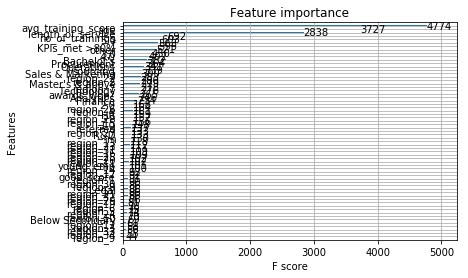

In [9]:
plot_importance(model)
plt.show()

In [15]:
model.feature_importances_

array([0.01064106, 0.01012198, 0.00687776, 0.00372005, 0.01475041,
       0.01574531, 0.00575309, 0.0129769 , 0.01193875, 0.00393633,
       0.00302794, 0.00441215, 0.00263864, 0.00510425, 0.00432563,
       0.00674799, 0.00471494, 0.00397958, 0.        , 0.00350376,
       0.01211177, 0.00441215, 0.00372005, 0.01224154, 0.00484471,
       0.00320097, 0.00471494, 0.00709404, 0.00575309, 0.00679124,
       0.00372005, 0.00250887, 0.00389307, 0.00480145, 0.00372005,
       0.00242235, 0.0023791 , 0.00696427, 0.00324423, 0.00337399,
       0.01202526, 0.00372005, 0.00190328, 0.01652392, 0.00298469,
       0.01206852, 0.02435332, 0.00562332, 0.02253655, 0.00592612,
       0.0146639 , 0.02993339, 0.16121636, 0.00640194, 0.00726706,
       0.01946535, 0.01738905, 0.02608357, 0.12276149, 0.02400727,
       0.01146293, 0.20650575, 0.00397958, 0.00436889], dtype=float32)

In [10]:
test = pd.read_csv(r'.\test_2umaH9m.csv')
test['good_score'] = test.avg_training_score.apply(lambda x : 1 if x>71 else 0)
test['young_emp'] = test.age.apply(lambda x : 1 if x<33 else 0)

In [11]:
final = pd.get_dummies(test.department)
final = pd.concat([final,pd.get_dummies(test.region)],axis=1)
final = pd.concat([final,pd.get_dummies(test.education)],axis=1)
final = pd.concat([final,pd.get_dummies(test.gender)],axis=1)
final = pd.concat([final,pd.get_dummies(test.recruitment_channel)],axis=1)
final = pd.concat([final,test.no_of_trainings],axis=1)
final = pd.concat([final,test.age],axis=1)
final = pd.concat([final,pd.get_dummies(test.previous_year_rating)],axis=1)
final = pd.concat([final,test.length_of_service],axis=1)
final = pd.concat([final,test['KPIs_met >80%']],axis=1)
final = pd.concat([final,test['awards_won?']],axis=1)
final = pd.concat([final,test['avg_training_score']],axis=1)
final = pd.concat([final,test['good_score']],axis=1)
final = pd.concat([final,test['young_emp']],axis=1)
final.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,region_1,...,2.0,3.0,4.0,5.0,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,good_score,young_emp
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,77,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,5,0,0,51,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,4,0,0,47,0,1
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,9,0,0,65,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,7,0,0,61,0,1


In [12]:
x_test = final
predicted= model.predict(x_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
test['is_promoted']=predicted
test = test[['employee_id','is_promoted']]
test.to_csv('prediction_XGB_v1.csv',index = False)